## Import required libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

## Load Dataset

In [2]:
df_cols = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
print(df_cols)
df = pd.read_csv("iris.data",   index_col = None, header = None, names = df_cols)
df.head()

['sepal length', 'sepal width', 'petal length', 'petal width', 'class']


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Perform EDA

In [3]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.value_counts()

sepal length  sepal width  petal length  petal width  class          
4.9           3.1          1.5           0.1          Iris-setosa        3
5.8           2.7          5.1           1.9          Iris-virginica     2
              4.0          1.2           0.2          Iris-setosa        1
5.9           3.0          4.2           1.5          Iris-versicolor    1
6.2           3.4          5.4           2.3          Iris-virginica     1
                                                                        ..
5.5           2.3          4.0           1.3          Iris-versicolor    1
              2.4          3.7           1.0          Iris-versicolor    1
                           3.8           1.1          Iris-versicolor    1
              2.5          4.0           1.3          Iris-versicolor    1
7.9           3.8          6.4           2.0          Iris-virginica     1
Name: count, Length: 147, dtype: int64

In [6]:
df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

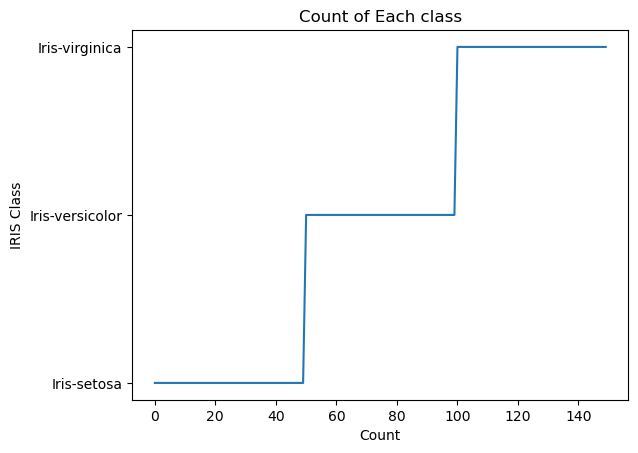

In [7]:
plt.plot(df['class'])
plt.xlabel("Count")
plt.ylabel("IRIS Class")
plt.title("Count of Each class")
plt.show()

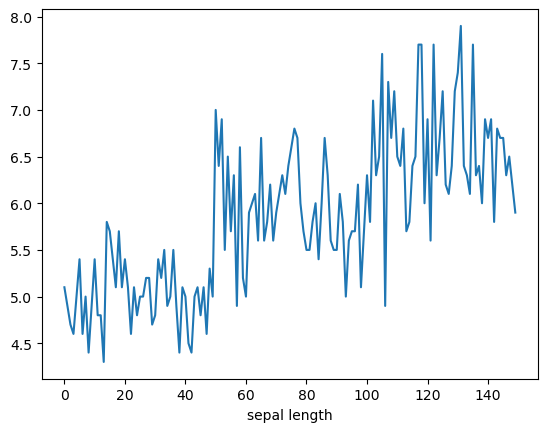

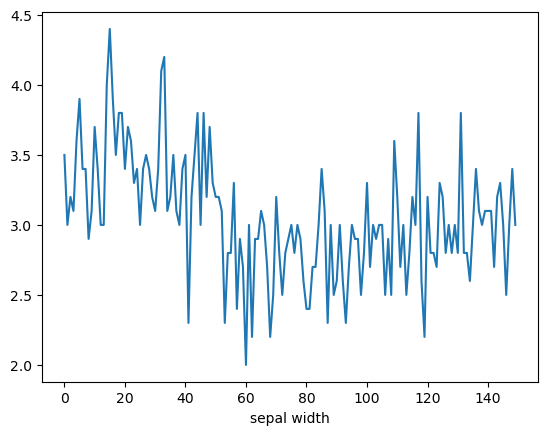

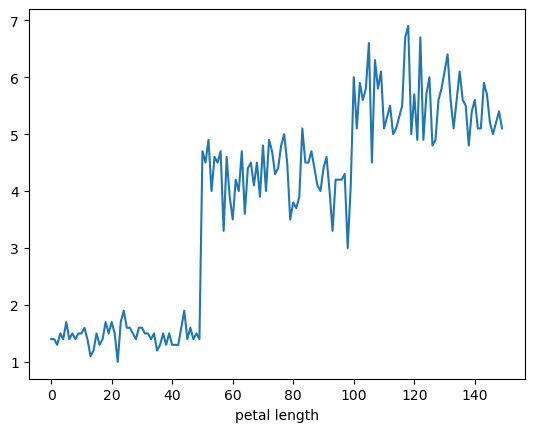

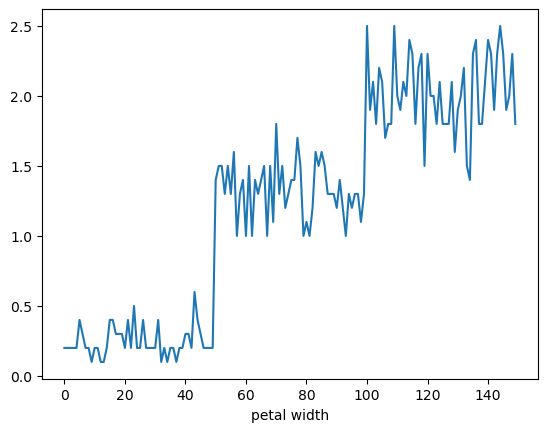

In [8]:
col_para = ['sepal length', 'sepal width', 'petal length', 'petal width']
colors = {'Iris-setosa': 'blue', 'Iris-virginica': 'red', 'Iris-versicolor': 'green'}
for i in col_para:
    
    colors = {'Iris-setosa': 'blue', 'Iris-virginica': 'red', 'Iris-versicolor' : 'green'}
    plt.plot(df[i])
    plt.xlabel(i)
    plt.show()
    

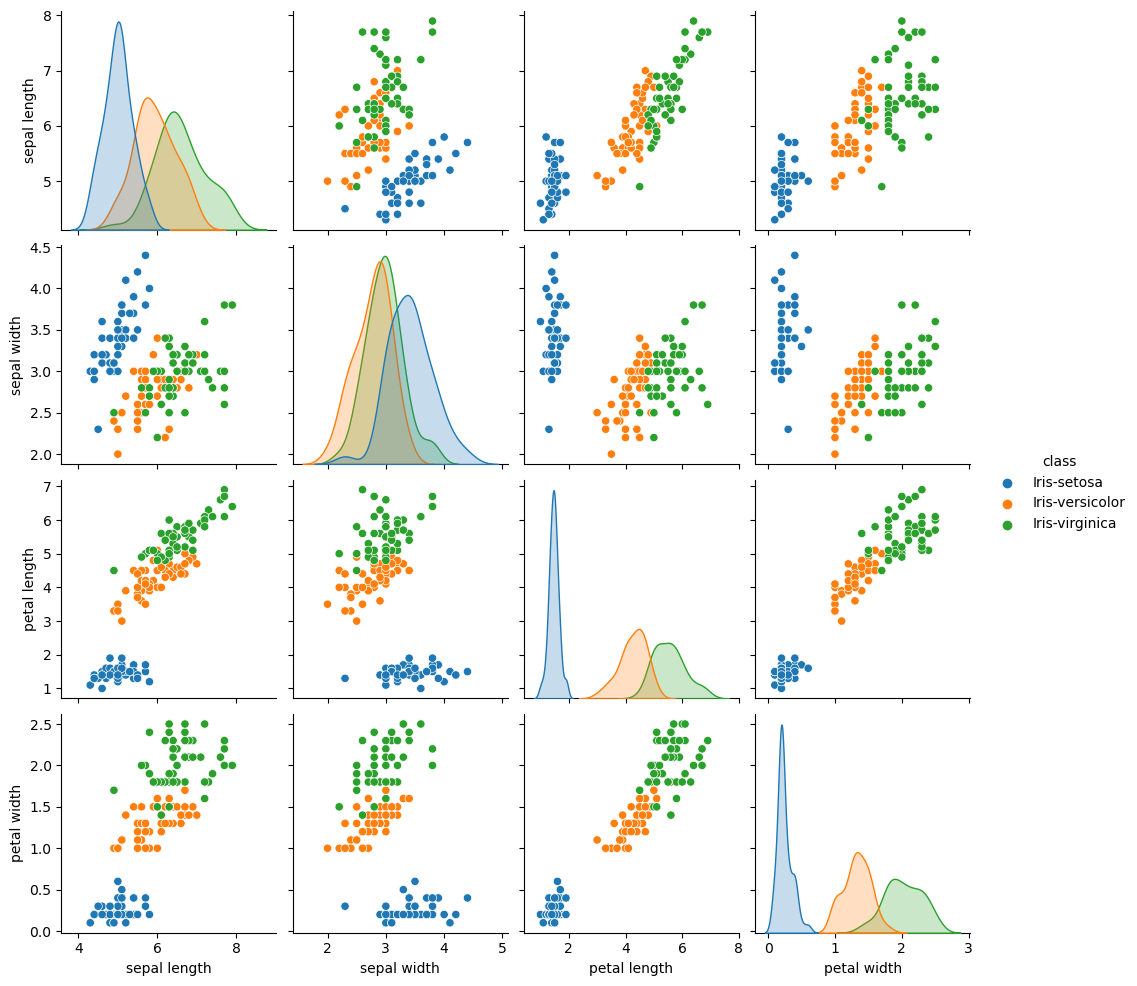

In [9]:
sns.pairplot(df, hue = 'class')
plt.show()

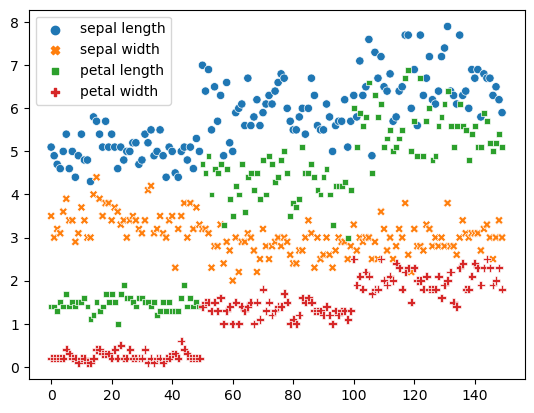

In [10]:
sns.scatterplot(df)
plt.show()

## Split the data into Train and Test data subsets

In [11]:
target = 'class'
X = df.drop(columns = target)
y = df[target]

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size= 0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## Model training & evaluation - SVC

In [13]:
model_svc = SVC()
model_svc.fit(X_train, y_train)

SVC()

In [14]:
svc_pred = model_svc.predict(X_test)

In [15]:
accuracy_score(y_test, svc_pred)

1.0

In [16]:
type(y_test)


pandas.core.series.Series

In [17]:
print(classification_report(y_test, svc_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## Model Training & Evaluation - Logistic Regression

In [18]:
model_lr=LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [19]:
lr_pred = model_lr.predict(X_test)

In [20]:
confusion_matrix(y_test,lr_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [21]:
accuracy_score(y_test,lr_pred)

1.0